<a href="https://colab.research.google.com/github/nandibula03/SMS_SPAM_DETECTION/blob/master/Sms_spam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing **packages** and Data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving spam.csv to spam.csv


Read **Data** *

In [ ]:
df = pd.read_csv('spam.csv',encoding='latin-1')

In [ ]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


**Unnecessary Column Remove**

In [ ]:
df = df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
df = df.rename(columns={"v1":"label", "v2":"text"})

In [ ]:
df.describe()

,label,text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [ ]:
df.groupby("label").describe()

text                                                               
      count unique                                                top freq
label                                                                     
ham    4825   4516                             Sorry, I'll call later   30
spam    747    653  Please call our customer service representativ...    4

**Distribution of the target variable**

In [ ]:
df.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

**Bar Plot**

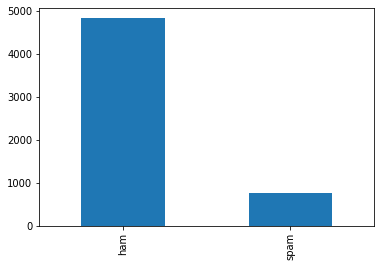

In [ ]:
df.label.value_counts().plot.bar();

**Add numerical label for spam**

In [ ]:
df['spam'] = df['label'].map( {'spam': 1, 'ham': 0} ).astype(int)
df.head(15)

,label,text,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
5,spam,FreeMsg Hey there darling it's been 3 week's n...,1
6,ham,Even my brother is not like to speak with me. ...,0
7,ham,As per your request 'Melle Melle (Oru Minnamin...,0
8,spam,WINNER!! As a valued network customer you have...,1
9,spam,Had your mobile 11 months or more? U R entitle...,1


**Add feature: length of message**

In [ ]:
df['length'] = df['text'].apply(len)

In [ ]:
df.head(10)

,label,text,spam,length
0,ham,"Go until jurong point, crazy.. Available only ...",0,111
1,ham,Ok lar... Joking wif u oni...,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,ham,U dun say so early hor... U c already then say...,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61
5,spam,FreeMsg Hey there darling it's been 3 week's n...,1,148
6,ham,Even my brother is not like to speak with me. ...,0,77
7,ham,As per your request 'Melle Melle (Oru Minnamin...,0,160
8,spam,WINNER!! As a valued network customer you have...,1,158
9,spam,Had your mobile 11 months or more? U R entitle...,1,154


**Histogram**

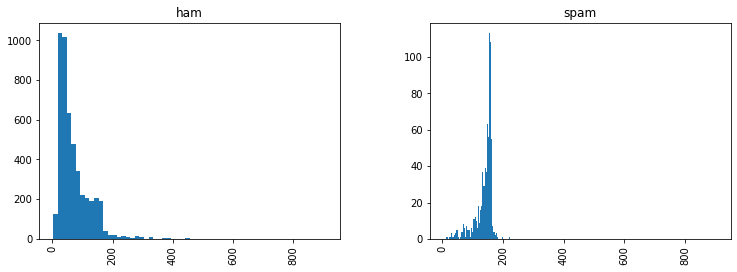

In [ ]:
df.hist(column='length',by='label',bins=60,figsize=(12,4));
plt.xlim(-40,950);

In [ ]:
df.isnull()

,label,text,spam,length
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
5567,False,False,False,False
5568,False,False,False,False
5569,False,False,False,False
5570,False,False,False,False


In [ ]:
df.isnull().sum()

label     0
text      0
spam      0
length    0
dtype: int64

In [ ]:
len(df)

5572

In [ ]:
df['label'].unique()

array(['ham', 'spam'], dtype=object)

In [ ]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

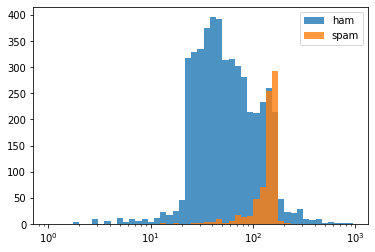

In [ ]:
plt.xscale('log')
bins = 1.15**(np.arange(0,50))
plt.hist(df[df['label']=='ham']['length'],bins= bins,alpha=0.8)
plt.hist(df[df['label']=='spam']['length'],bins= bins,alpha=0.8)
plt.legend(('ham','spam'))
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# x is feature data
x = df['text']
# y  label data
y= df['label']
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.3, random_state=42)

In [ ]:
x_train.shape

(3900,)

In [ ]:
x_test.shape

(1672,)

In [ ]:
y_train.shape

(3900,)

In [ ]:
y_test.shape

(1672,)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()

x_train_counts = count_vect.fit_transform(x_train)
x_train_counts.shape

(3900, 7206)

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()

x_train_tfidf = tfidf_transformer.fit_transform(x_train_counts)
x_train_tfidf.shape

(3900, 7206)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

x_train_tfidf = vectorizer.fit_transform(x_train) # remember to use the original x_train set
x_train_tfidf.shape

(3900, 7206)

In [ ]:
from sklearn.svm import LinearSVC
clf = LinearSVC()
clf.fit(x_train_tfidf,y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [ ]:
from sklearn.pipeline import Pipeline
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.svm import LinearSVC

text_clf = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', LinearSVC()),
])

# Feed the training data through the pipeline
text_clf.fit(x_train, y_train) 

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 LinearSVC(C=1.0, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
               

In [ ]:
# Form a prediction set
p = text_clf.predict(x_test)

In [ ]:
# Report the confusion matrix
from sklearn import metrics
print(metrics.confusion_matrix(y_test,p))

[[1450    3]
 [  25  194]]


In [ ]:
# Print a classification report
print(metrics.classification_report(y_test,p))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1453
        spam       0.98      0.89      0.93       219

    accuracy                           0.98      1672
   macro avg       0.98      0.94      0.96      1672
weighted avg       0.98      0.98      0.98      1672



In [ ]:
# Print the overall accuracy
print(metrics.accuracy_score(y_test,p))

0.9832535885167464


In [ ]:
text_clf.predict(['Hi, How are you doing?'])

array(['ham'], dtype=object)

In [ ]:
text_clf.predict(['Congratulations, you have been selected as Winner, please dial 1234 for the winner gift'])

array(['spam'], dtype=object)